# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}&appid={weather_api_key}&units=metric'
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']
        city_lng =  city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | scarborough
Processing Record 2 of Set 1 | tan-tan
Processing Record 3 of Set 1 | malagon
Processing Record 4 of Set 1 | kibaya
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | koh kong
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | agadez
Processing Record 10 of Set 1 | lihue
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | berezovyy
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | mata-utu
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | siwa oasis
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | holualoa
Processing Re

City not found. Skipping...
Processing Record 40 of Set 5 | turinsk
City not found. Skipping...
Processing Record 41 of Set 5 | nurota
City not found. Skipping...
Processing Record 42 of Set 5 | walvis bay
City not found. Skipping...
Processing Record 43 of Set 5 | christchurch
City not found. Skipping...
Processing Record 44 of Set 5 | orangeburg
City not found. Skipping...
Processing Record 45 of Set 5 | kupang
City not found. Skipping...
Processing Record 46 of Set 5 | villarejo de salvanes
City not found. Skipping...
Processing Record 47 of Set 5 | gurupi
City not found. Skipping...
Processing Record 48 of Set 5 | northam
City not found. Skipping...
Processing Record 49 of Set 5 | belmonte
City not found. Skipping...
Processing Record 0 of Set 6 | la passe
City not found. Skipping...
Processing Record 1 of Set 6 | ta`u
City not found. Skipping...
Processing Record 2 of Set 6 | cidreira
City not found. Skipping...
Processing Record 3 of Set 6 | pandan
City not found. Skipping...
Pro

City not found. Skipping...
Processing Record 10 of Set 8 | isla mujeres
City not found. Skipping...
Processing Record 11 of Set 8 | oltinko'l
City not found. Skipping...
Processing Record 12 of Set 8 | molde
City not found. Skipping...
Processing Record 13 of Set 8 | narrabri
City not found. Skipping...
Processing Record 14 of Set 8 | olot shahri
City not found. Skipping...
Processing Record 15 of Set 8 | vilyuchinsk
City not found. Skipping...
Processing Record 16 of Set 8 | champerico
City not found. Skipping...
Processing Record 17 of Set 8 | hihifo
City not found. Skipping...
Processing Record 18 of Set 8 | kapshagay
City not found. Skipping...
Processing Record 19 of Set 8 | baoqing
City not found. Skipping...
Processing Record 20 of Set 8 | mitchell
City not found. Skipping...
Processing Record 21 of Set 8 | khandyga
City not found. Skipping...
Processing Record 22 of Set 8 | bijapur
City not found. Skipping...
Processing Record 23 of Set 8 | sisimiut
City not found. Skipping...

City not found. Skipping...
Processing Record 27 of Set 10 | tadine
City not found. Skipping...
Processing Record 28 of Set 10 | gretna
City not found. Skipping...
Processing Record 29 of Set 10 | bandarbeyla
City not found. Skipping...
Processing Record 30 of Set 10 | kuressaare
City not found. Skipping...
Processing Record 31 of Set 10 | neon karlovasion
City not found. Skipping...
Processing Record 32 of Set 10 | ciamis
City not found. Skipping...
Processing Record 33 of Set 10 | svetlogorsk
City not found. Skipping...
Processing Record 34 of Set 10 | alofi
City not found. Skipping...
Processing Record 35 of Set 10 | douentza
City not found. Skipping...
Processing Record 36 of Set 10 | bubaque
City not found. Skipping...
Processing Record 37 of Set 10 | olgii
City not found. Skipping...
Processing Record 38 of Set 10 | chernyshevsk
City not found. Skipping...
Processing Record 39 of Set 10 | nishinoomote
City not found. Skipping...
Processing Record 40 of Set 10 | tazacorte
City not

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,scarborough,54.2797,-0.4044,5.37,79,100,2.24,GB,1707271428
1,tan-tan,28.4380,-11.1032,15.92,35,5,2.46,MA,1707272052
2,malagon,39.2139,-4.0005,5.96,94,1,2.28,ES,1707272052
3,kibaya,-5.3000,36.5667,15.00,94,5,0.69,TZ,1707272052
4,koh kong,11.6175,102.9806,27.76,76,43,1.77,KH,1707272053


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,scarborough,54.2797,-0.4044,5.37,79,100,2.24,GB,1707271428
1,tan-tan,28.4380,-11.1032,15.92,35,5,2.46,MA,1707272052
2,malagon,39.2139,-4.0005,5.96,94,1,2.28,ES,1707272052
3,kibaya,-5.3000,36.5667,15.00,94,5,0.69,TZ,1707272052
4,koh kong,11.6175,102.9806,27.76,76,43,1.77,KH,1707272053


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

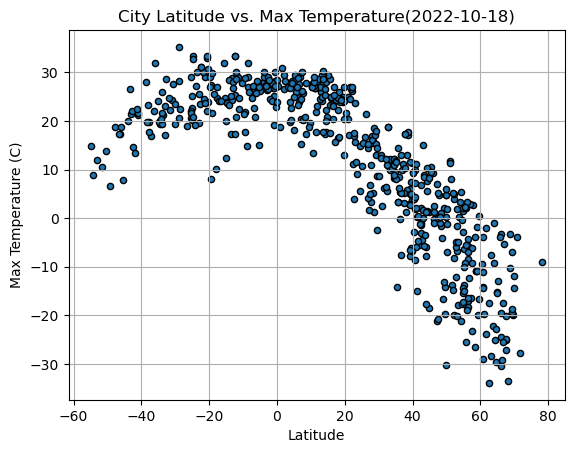

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = ['Lat'], y = ['Max Temp'], marker='o', grid = True, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

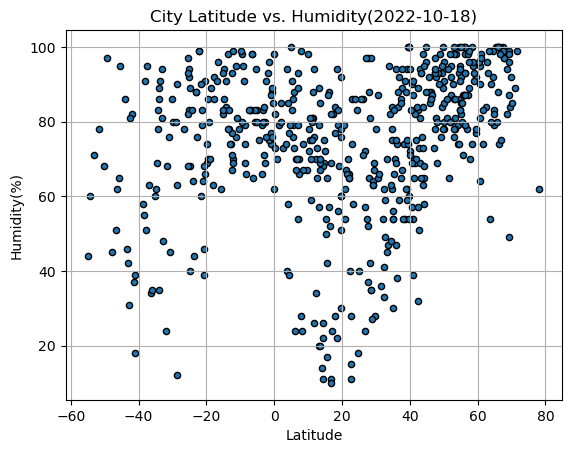

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = ['Lat'], y = ['Humidity'], marker='o', grid = True, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

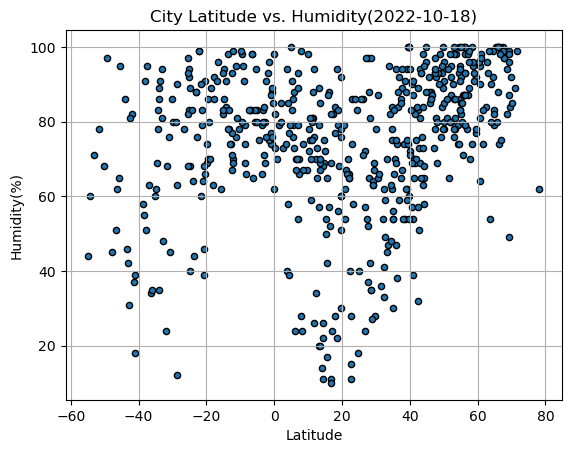

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = ['Lat'], y = ['Humidity'], marker='o', grid = True, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

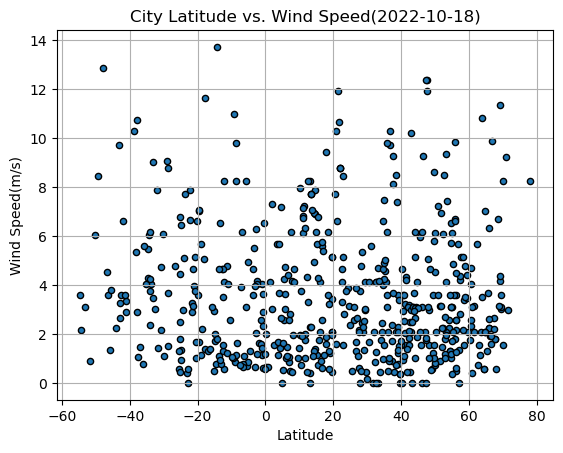

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = ['Lat'], y = ['Wind Speed'], marker='o', grid = True, edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE